In [84]:
import requests
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# 1. Twitch API data

The URL `https://wind-bow.glitch.me/twitch-api/channels/{CHANNEL_NAME}` is an API from twitch to get data from twitch channels.

Get the data from the following channels:

```
["ESL_SC2", "OgamingSC2", "cretetion", "freecodecamp", 
    "storbeck", "habathcx", "RobotCaleb", "noobs2ninjas",
    "ninja", "shroud", "Dakotaz", "esltv_cs", "pokimane", 
    "tsm_bjergsen", "boxbox", "wtcn", "a_seagull",
    "kinggothalion", "amazhs", "jahrein", "thenadeshot", 
    "sivhd", "kingrichard"]
```

To make into a dataframe that looks like this:

![](twitch.png)

In [113]:
api_list = ["ESL_SC2", "OgamingSC2", "cretetion", "freecodecamp", 
    "storbeck", "habathcx", "RobotCaleb", "noobs2ninjas",
    "ninja", "shroud", "Dakotaz", "esltv_cs", "pokimane", 
    "tsm_bjergsen", "boxbox", "wtcn", "a_seagull",
    "kinggothalion", "amazhs", "jahrein", "thenadeshot", 
    "sivhd", "kingrichard"]

df = pd.DataFrame(columns = ['_id', 'display_name', 'status', 'followers', 'views'])
for item in api_list:
    link = 'https://wind-bow.glitch.me/twitch-api/channels/' + item
    r = requests.get(link)
    
    if json.loads(r.content) == {"status":404,"error":"not found"}:
        continue
    else:
        new_data = pd.DataFrame.from_dict(json.loads(r.content))
        df = df.append(new_data[['_id', 'display_name', 'status', 'followers', 'views']])
        

,_id,display_name,status,followers,views
chat,30220059,ESL_SC2,RERUN: StarCraft 2 - Terminator vs. Parting (P...,135394,60991791
commercial,30220059,ESL_SC2,RERUN: StarCraft 2 - Terminator vs. Parting (P...,135394,60991791
editors,30220059,ESL_SC2,RERUN: StarCraft 2 - Terminator vs. Parting (P...,135394,60991791
follows,30220059,ESL_SC2,RERUN: StarCraft 2 - Terminator vs. Parting (P...,135394,60991791
self,30220059,ESL_SC2,RERUN: StarCraft 2 - Terminator vs. Parting (P...,135394,60991791
...,...,...,...,...,...
self,82534701,noobs2ninjas,Building a new hackintosh for #programming and...,835,48102
stream_key,82534701,noobs2ninjas,Building a new hackintosh for #programming and...,835,48102
subscriptions,82534701,noobs2ninjas,Building a new hackintosh for #programming and...,835,48102
teams,82534701,noobs2ninjas,Building a new hackintosh for #programming and...,835,48102


# 2. App Store Reviews

The Apple app store has a `GET` API to get reviews on apps. The URL is:

```
https://itunes.apple.com/{COUNTRY_CODE}/rss/customerreviews/id={APP_ID_HERE}/page={PAGE_NUMBER}/sortby=mostrecent/json
```

Note that you need to provide:

- The country code (eg. `'us'`, `'gb'`, `'ca'`, `'au'`) 

- The app ID. This can be found in the web page for the app right after `id`. For instance, Candy Crush's US webpage is:

`https://apps.apple.com/us/app/candy-crush-saga/id553834731`

So here the ID would be `553834731`.

- The "Page Number". The request responds with multiple pages of data, but sends them one at a time. So you can cycle through the data pages for any app on any country.

### 2.1 English app reviews

Get all english reviews you can for Candy Crush, Tinder, the Facebook app and Twitter (you have to get them from all the english-speaking countries you can think of!).

### 2.2 Best version

For each app, get the version that is the best rated.

Make a visualization of the ratings per versions per app to show this.

### 2.3 Top words

Which word for each app is most common in the 5 star and in the 1-star review's titles?

Note: `df.title.str.get_dummies()` is your friend

Note: This might create a lot of data! Try to break down your analysis in chunks if it doesn't work.

In [200]:
#2.1

cols = ['review_id', 'title', 'author', 'author_url', 'version', 'rating', 'review', 'vote_count']
countries = ['ag', 'au', 'bb', 'dm', 'gb', 'gd', 'ie', 'jm', 'kn', 'nz', 'tt', 'us']

def get_reviews(countries, app, pages):
    df = pd.DataFrame()
    for country in countries:
        for page in range(1, pages):
            link = ('https://itunes.apple.com/' 
                    + country + '/rss/customerreviews/id='
                    + app +'/page='
                    + str(page) +'/sortby=mostrecent/json')
            r = requests.get(link)
            data = json.loads(r.content)
            data = data.get('feed')

            for entry in data.get('entry', 'stopit'):
                if isinstance(entry, str):
                    break
                # if entry.get('im:name'): continue
                review_id = entry.get('id').get('label')
                title = entry.get('title').get('label')
                author = entry.get('author').get('name').get('label')
                author_url = entry.get('author').get('uri').get('label')
                version = entry.get('im:version').get('label')
                rating = entry.get('im:rating').get('label')
                review = entry.get('content').get('label')
                vote_count = entry.get('im:voteCount').get('label')

                csvData = [review_id, title, author, author_url, version, rating, review, vote_count]
                rev = pd.DataFrame(csvData).T
                df = df.append(rev)
    
    return df.rename(columns={0: "review_id", 
    1: "title", 2: "author", 3: "author_url", 
    4: "version", 5: "rating", 6: "review", 
    7: "vote_count"})

#The last number in the function indicates how many pages should be scrolled. I've ran it pretty high and it works, just takes along time. I set it to 5 here to save you the pain.

Candy_df = get_reviews(countries, '553834731', 5)
Tinder_df = get_reviews(countries, '547702041', 5)
Zucker_df = get_reviews(countries, '284882215', 5)
Twitter_df = get_reviews(countries, '333903271', 5)

The highest reviewed version of Candy Crush is: 1.0.11
The highest reviewed version of Tinder is: 4.7.1
The highest reviewed version of Facebook is: 35.0
The highest reviewed version of Twitter is: 6.5


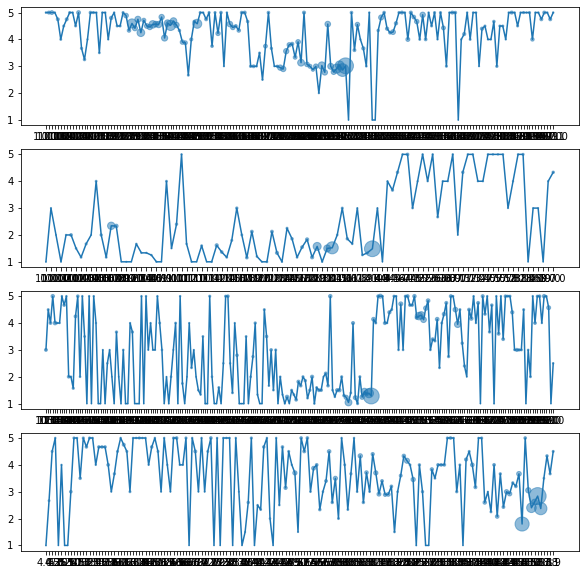

In [204]:
#2.2

# Yes, I know this is sloppy and I hate it. The visualization includes a scatter plot which uses size to denote ratings because I felt that the mean scores were not balanced without attention to how many ratings they received.

# I (stupidly) alter the original dataframes. Uncomment if you need to bring them back.

Candy_df = get_reviews(countries, '553834731', 5) 
Tinder_df = get_reviews(countries, '547702041', 5)
Zucker_df = get_reviews(countries, '284882215', 5)
Twitter_df = get_reviews(countries, '333903271', 5)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(10, 10))

Candy_df['rating'] = Candy_df['rating'].astype(float)
Candy_df = Candy_df.groupby(by='version', as_index=False).agg([np.mean, np.sum])
Candy_df.columns = Candy_df.columns.droplevel(0)

Tinder_df['rating'] = Tinder_df['rating'].astype(float)
Tinder_df = Tinder_df.groupby(by='version', as_index=False).agg([np.mean, np.sum])
Tinder_df.columns = Tinder_df.columns.droplevel(0)

Zucker_df['rating'] = Zucker_df['rating'].astype(float)
Zucker_df = Zucker_df.groupby(by='version', as_index=False).agg([np.mean, np.sum])
Zucker_df.columns = Zucker_df.columns.droplevel(0)

Twitter_df['rating'] = Twitter_df['rating'].astype(float)
Twitter_df = Twitter_df.groupby(by='version', as_index=False).agg([np.mean, np.sum])
Twitter_df.columns = Twitter_df.columns.droplevel(0)

ax1.plot(Candy_df.index, Candy_df['mean'])
ax1.scatter(Candy_df.index, Candy_df['mean'], s=Candy_df['sum']/2, alpha = 0.5)
ax2.plot(Tinder_df.index, Tinder_df['mean'])
ax2.scatter(Tinder_df.index, Tinder_df['mean'], s=Tinder_df['sum']/2, alpha = 0.5)
ax3.plot(Zucker_df.index, Zucker_df['mean'])
ax3.scatter(Zucker_df.index, Zucker_df['mean'], s=Zucker_df['sum']/2, alpha = 0.5)
ax4.plot(Twitter_df.index, Twitter_df['mean'])
ax4.scatter(Twitter_df.index, Twitter_df['mean'], s=Twitter_df['sum']/2, alpha = 0.5);

sorted = Candy_df.sort_values(['mean', 'sum'], ascending=False, inplace=False)
print('The highest reviewed version of Candy Crush is:', sorted.index[0])
sorted = Tinder_df.sort_values(['mean', 'sum'], ascending=False, inplace=False)
print('The highest reviewed version of Tinder is:', sorted.index[0])
sorted = Zucker_df.sort_values(['mean', 'sum'], ascending=False, inplace=False)
print('The highest reviewed version of Facebook is:', sorted.index[0])
sorted = Twitter_df.sort_values(['mean', 'sum'], ascending=False, inplace=False)
print('The highest reviewed version of Twitter is:', sorted.index[0])

In [216]:
#2.3
Candy_df = get_reviews(countries, '553834731', 5)
Tinder_df = get_reviews(countries, '547702041', 5)
Zucker_df = get_reviews(countries, '284882215', 5)
Twitter_df = get_reviews(countries, '333903271', 5)

from collections import Counter

def bestworst(df, goodorbad):
    temp_list = []
    if goodorbad:
        temp_df = df.loc[df.rating.astype(int) == 5]
    else:
        temp_df = df.loc[df.rating.astype(int) == 1]
    for list_ in temp_df.title.str.split():
        for word in list_:
            word = word.lower()
            #These useless words were annoying me. Pretty easy to comment out this section if they are considered useful.
            if (word == 'candy' 
            or word == 'crush' 
            or word == 'tinder' 
            or word == 'facebook'
            or word ==  'twitter' 
            or word == 'app' 
            or word == 'game'
            or word == 'the'
            or word == 'to'
            or word == 'a'
            or word == 'not'):
                pass
            else:
                temp_list.append(word)
    return Counter(temp_list).most_common(1)[0][0]

print('The most common word among five star reviews for Candy Crush is "', bestworst(Candy_df, True),'".')
print('The most common word among five star reviews for Tinder is "', bestworst(Tinder_df, True),'".')
print('The most common word among five star reviews for Facebook is "', bestworst(Zucker_df, True),'".')
print('The most common word among five star reviews for Twitter is "', bestworst(Twitter_df, True),'".')

print('The most common word among one star reviews for Candy Crush is "', bestworst(Candy_df, False),'".')
print('The most common word among one star reviews for Tinder is "', bestworst(Tinder_df, False),'".')
print('The most common word among one star reviews for Facebook is "', bestworst(Zucker_df, False),'".')
print('The most common word among one star reviews for Twitter is "', bestworst(Twitter_df, False),'".')

#Gotta laugh at that return for the one star on Tinder/Twitter/Facebook.

The most common word among five star reviews for Candy Crush is " great ".
The most common word among five star reviews for Tinder is " love ".
The most common word among five star reviews for Facebook is " great ".
The most common word among five star reviews for Twitter is " good ".
The most common word among one star reviews for Candy Crush is " money ".
The most common word among one star reviews for Tinder is " banned ".
The most common word among one star reviews for Facebook is " censorship ".
The most common word among one star reviews for Twitter is " censorship ".


# 3 (STRETCH) IMDB scraping

IMDB has structured web pages. We can exploit this to scrape movie data.

Usinf the following URL:

`https://www.imdb.com/search/title/?groups=top_1000&start={PAGE_NUMBER}&ref_=adv_nxt`

With the following headers in your `GET` request: `{"Accept-Language": "en-US,en;q=0.5"}`

You can generate a dataframe like this one by cycling over the page numbers in the URL requested:

![](IMDB.png)

Note that the following  page attribues will be of interest:

- `div` with a class of `lister-item mode-advanced`

- Various `span` objects within that `div` like `lister-item-year` and `runtime` and `metascore`